# Human Stress Detection using Multi-Layer Perceptrons

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sb

<div style="font-size:1.5em;"><b>Reading the dataset</b></div>

In [ ]:
data=pd.read_csv(f"Dataset for hsd.csv")
data.head()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [3]:
data.shape

(630, 9)

<div style="font-size:1.2em;">I'm renaming the columns here just for easy understanding.</div>

In [4]:
data.columns=['snoring_rate', 'respiration_rate', 'body_temperature', 'limb_movement', 'blood_oxygen', \
             'eye_movement', 'sleeping_hours', 'heart_rate', 'stress_level']
data.head()

,snoring_rate,respiration_rate,body_temperature,limb_movement,blood_oxygen,eye_movement,sleeping_hours,heart_rate,stress_level
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


<div style="font-size:1.5em;"><b>Checking for null values</b></div>

In [5]:
data.isnull().any()

snoring_rate        False
respiration_rate    False
body_temperature    False
limb_movement       False
blood_oxygen        False
eye_movement        False
sleeping_hours      False
heart_rate          False
stress_level        False
dtype: bool

<div style="font-size:1.2em;">Since there are no null values, I'm proceeding to the next step.</div>

<div style="font-size:1.5em;"><b>Splitting the data into Train and Test datasets</b></div>

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test=train_test_split(data.iloc[:, :8], data['stress_level'], \
                                                  test_size=0.2, random_state=8)
X_train.shape, X_test.shape

((504, 8), (126, 8))

<div style="font-size:1.5em;"><b>Performing One Hot Encoding on Labels</b></div>

<div style="font-size:1.2em;">I'm converting the labels to binary matrices before feeding them to the MLP model.</div>

In [8]:
from tensorflow.keras.utils import to_categorical

In [9]:
num_classes=5
y_train=to_categorical(y_train, num_classes)
y_test=to_categorical(y_test, num_classes)
y_train[:5]

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]], dtype=float32)

<div style="font-size:1.5em;"><b>Multi-layer Perceptron model</b></div>

<div style="font-size:1.2em;">I'm using two hidden layers with 125 nodes and 'ReLU' activation in each layer.</div>

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [11]:
model=Sequential()
model.add(Dense(125, activation="relu"))
model.add(Dense(125, activation="relu"))
model.add(Dense(5, "softmax"))

<div style="font-size:1.2em;">I'm compiling the model with <b>adam</b> optimizer, <b>cross-entropy</b> loss and <b>accuracy</b> metric. Also, I'm running this model for <b>50</b> epochs. I'm also using a <b>validation set</b> which will be tested on the model at the end of each epoch.</div>

In [12]:
epochs=50
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
stats=model.fit(X_train, y_train, epochs=epochs, validation_split=0.2)

Epoch 1/50

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

13/13 [==============================] - 1s 43ms/step - loss: 2.9355 - accuracy: 0.4119 - val_loss: 1.6024 - val_accuracy: 0.4158
Epoch 2/50
13/13 [==============================] - 0s 6ms/step - loss: 0.9495 - accuracy: 0.6377 - val_loss: 0.6510 - val_accuracy: 0.7327
Epoch 3/50
13/13 [==============================] - 0s 5ms/step - loss: 0.5206 - accuracy: 0.8263 - val_loss: 0.5249 - val_accuracy: 0.9208
Epoch 4/50
13/13 [==============================] - 0s 5ms/step - loss: 0.4458 - accura

<div style="font-size:1.5em;"><b>Visualizing Training Results</b></div>

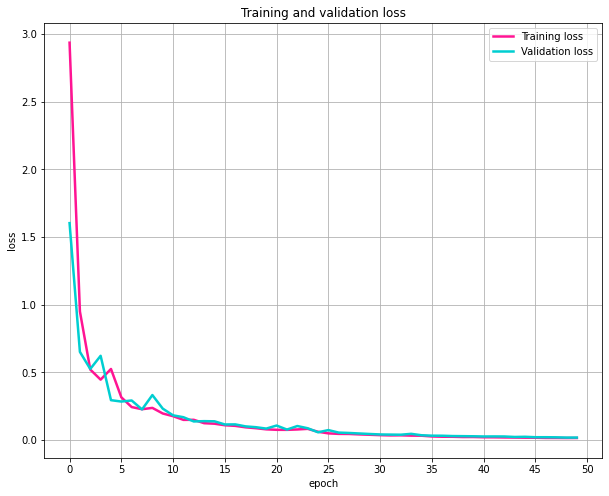

In [13]:
stats_df=pd.DataFrame(stats.history)
stats_df['epoch']=list(range(epochs))
plot.figure(figsize=(10, 8))
sb.lineplot(y='loss', x='epoch', data=stats_df, color='deeppink', linewidth=2.5, label="Training loss")
sb.lineplot(y='val_loss', x='epoch', data=stats_df, color='darkturquoise', linewidth=2.5, label="Validation loss")
plot.grid()
plot.legend()
plot.title("Training and validation loss")
plot.xticks(range(0, 51, 5));

<div style="font-size:1.2em;">Since we can see in the graph that the training and validation loss curve converged around the 25th epoch, this model has the best fit on this dataset.</div>

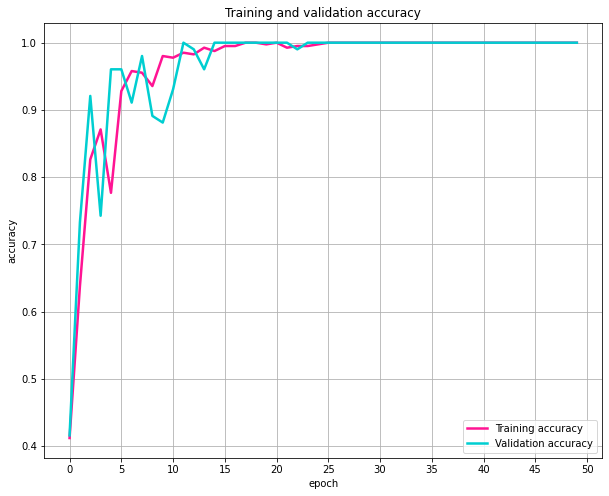

In [14]:
stats_df=pd.DataFrame(stats.history)
stats_df['epoch']=list(range(epochs))
plot.figure(figsize=(10, 8))
sb.lineplot(y='accuracy', x='epoch', data=stats_df, color='deeppink', linewidth=2.5, label="Training accuracy")
sb.lineplot(y='val_accuracy', x='epoch', data=stats_df, color='darkturquoise', linewidth=2.5, \
            label="Validation accuracy")
plot.grid()
plot.legend()
plot.title("Training and validation accuracy")
plot.xticks(range(0, 51, 5));

<div style="font-size:1.5em;"><b>Testing the model on Test set</b></div>

In [15]:
_, accuracy=model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 998us/step - loss: 0.0157 - accuracy: 1.0000


<div style="font-size:1.2em;">This model has an <b>accuracy</b> of <b>100%</b> on the test set.</div>